### Assignment - 1

#### 1. Load and Inspect the CMAPSS Dataset
Task:
- Write Python code to load the raw `train_FD001.txt` dataset for CMAPSS using Pandas, assign appropriate column names, and display the shape, data types, and first 5 rows of the DataFrame.
- Expected Output: DataFrame shape, info, and sample rows.

Use the link to download the dataset:
https://data.nasa.gov/dataset/cmapss-jet-engine-simulated-data

In [6]:
import pandas as pd
column_names = [
    "engine_id", "cycle", 
    "op_setting_1", "op_setting_2", "op_setting_3"
] + [f"sensor_{i}" for i in range(1, 22)]
file_path = "train_FD001.txt"   
df = pd.read_csv(file_path, sep=r"\s+", header=None, names=column_names)
print("Shape of the dataset:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nSample Rows:")
print(df.head())


Shape of the dataset: (20631, 26)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   engine_id     20631 non-null  int64  
 1   cycle         20631 non-null  int64  
 2   op_setting_1  20631 non-null  float64
 3   op_setting_2  20631 non-null  float64
 4   op_setting_3  20631 non-null  float64
 5   sensor_1      20631 non-null  float64
 6   sensor_2      20631 non-null  float64
 7   sensor_3      20631 non-null  float64
 8   sensor_4      20631 non-null  float64
 9   sensor_5      20631 non-null  float64
 10  sensor_6      20631 non-null  float64
 11  sensor_7      20631 non-null  float64
 12  sensor_8      20631 non-null  float64
 13  sensor_9      20631 non-null  float64
 14  sensor_10     20631 non-null  float64
 15  sensor_11     20631 non-null  float64
 16  sensor_12     20631 non-null  float64
 17  sensor_13     20631 

#### 2. Visualize Sensor Distributions and Identify Missing Values
Task:
- Using the loaded dataset (or the cleaned version), visualize the distribution of values for any three sensor columns with histograms, and check for missing values in all columns.
- Expected Output: Three histogram plots and a summary/report on missing values per column.

Missing Values per Column:

engine_id       0
cycle           0
op_setting_1    0
op_setting_2    0
op_setting_3    0
sensor_1        0
sensor_2        0
sensor_3        0
sensor_4        0
sensor_5        0
sensor_6        0
sensor_7        0
sensor_8        0
sensor_9        0
sensor_10       0
sensor_11       0
sensor_12       0
sensor_13       0
sensor_14       0
sensor_15       0
sensor_16       0
sensor_17       0
sensor_18       0
sensor_19       0
sensor_20       0
sensor_21       0
dtype: int64


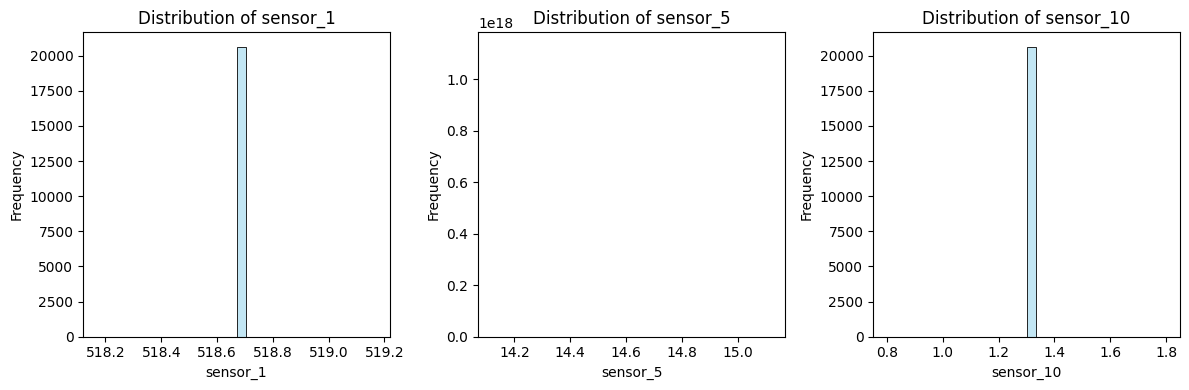

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
missing_summary = df.isnull().sum()
print("Missing Values per Column:\n")
print(missing_summary)
sensor_cols = ["sensor_1", "sensor_5", "sensor_10"]
plt.figure(figsize=(12, 4))

for i, col in enumerate(sensor_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[col], bins=30, kde=True, color="skyblue")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


#### 3. Feature Engineering – Aggregation and Rolling Statistics
Task:
- For a selected sensor (e.g., `sensor_2`), compute and append to the DataFrame:
  - The mean and standard deviation of `sensor_2` by each `engine_id`

  - The rolling mean (window size=5) for each engine’s `sensor_2` readings
- Expected Output: Show a few sample rows with these new features.

In [8]:

engine_stats = df.groupby("engine_id")["sensor_2"].agg(["mean", "std"]).reset_index()
engine_stats.rename(columns={"mean": "sensor_2_mean_by_engine", "std": "sensor_2_std_by_engine"}, inplace=True)
df = df.merge(engine_stats, on="engine_id", how="left")
df["sensor_2_rolling_mean_5"] = (
    df.groupby("engine_id")["sensor_2"]
    .rolling(window=5, min_periods=1)
    .mean()
    .reset_index(level=0, drop=True)
)
print(df[["engine_id", "cycle", "sensor_2", "sensor_2_mean_by_engine", "sensor_2_std_by_engine", "sensor_2_rolling_mean_5"]].head(10))


   engine_id  cycle  sensor_2  sensor_2_mean_by_engine  \
0          1      1    641.82               642.621042   
1          1      2    642.15               642.621042   
2          1      3    642.35               642.621042   
3          1      4    642.35               642.621042   
4          1      5    642.37               642.621042   
5          1      6    642.10               642.621042   
6          1      7    642.48               642.621042   
7          1      8    642.56               642.621042   
8          1      9    642.12               642.621042   
9          1     10    641.71               642.621042   

   sensor_2_std_by_engine  sensor_2_rolling_mean_5  
0                0.486795               641.820000  
1                0.486795               641.985000  
2                0.486795               642.106667  
3                0.486795               642.167500  
4                0.486795               642.208000  
5                0.486795               642

#### 4. Data Normalization
Task:
- Normalize all sensor columns in the DataFrame using `StandardScaler` from `scikit-learn` (zero mean, unit variance) and create a new DataFrame, maintaining the original `engine_id` and `cycle` columns.
- Expected Output: Head of the normalized DataFrame and a check that means are close to zero, std are close to one.

In [10]:
from sklearn.preprocessing import StandardScaler
sensor_cols = [col for col in df.columns if 'sensor_' in col]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[sensor_cols])
df_normalized = pd.DataFrame(scaled_data, columns=sensor_cols)
df_normalized["engine_id"] = df["engine_id"].values
df_normalized["cycle"] = df["cycle"].values
df_normalized = df_normalized[["engine_id", "cycle"] + sensor_cols]
print("Head of normalized DataFrame:")
print(df_normalized.head())
print("\nMean of normalized features:")
print(df_normalized[sensor_cols].mean().round(4))

print("\nStandard deviation of normalized features:")
print(df_normalized[sensor_cols].std().round(4))


Head of normalized DataFrame:
   engine_id  cycle  sensor_1  sensor_2  sensor_3  sensor_4      sensor_5  \
0          1      1       0.0 -1.721725 -0.134255 -0.925936 -1.776357e-15   
1          1      2       0.0 -1.061780  0.211528 -0.643726 -1.776357e-15   
2          1      3       0.0 -0.661813 -0.413166 -0.525953 -1.776357e-15   
3          1      4       0.0 -0.661813 -1.261314 -0.784831 -1.776357e-15   
4          1      5       0.0 -0.621816 -1.251528 -0.301518 -1.776357e-15   

   sensor_6  sensor_7  sensor_8  ...  sensor_15     sensor_16  sensor_17  \
0  0.141683  1.121141 -0.516338  ...  -0.603816 -1.387779e-17  -0.781710   
1  0.141683  0.431930 -0.798093  ...  -0.275852 -1.387779e-17  -0.781710   
2  0.141683  1.008155 -0.234584  ...  -0.649144 -1.387779e-17  -2.073094   
3  0.141683  1.222827  0.188048  ...  -1.971665 -1.387779e-17  -0.781710   
4  0.141683  0.714393 -0.516338  ...  -0.339845 -1.387779e-17  -0.136018   

   sensor_18  sensor_19  sensor_20  sensor_21  sen

#### 5. Rolling Window Sequence Generation
Task:
- Write a function to generate rolling window sequences of length 30 for the sensors of each engine. Save the resulting 3D NumPy array (num_sequences, window_size, num_features), and save the corresponding engine_id and cycle identifier lists as CSV files. Print the shape of the resulting sequence array and contents of the first entry.
- Expected Output: Array shape, example content, and confirmation of successful file saves.